# Digit Classifier Project

this notebook shows some of the visualisations done for the digit classification project <br> dataset: MNIST handwritten digit dataset

In [34]:
from model import CNN, ANN
from get_data import load_data
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch
import os
from PIL import Image

%matplotlib inline  
torch.manual_seed(42)

In [2]:
train_dset = dsets.MNIST(
        root = "./data",
        train = True,
        transform = transforms.ToTensor(),
        download = True
    )

test_dset = dsets.MNIST(
    root = "./data",
    train = False,
    transform = transforms.ToTensor()
)

In [3]:
print(len(train_dset))
print(len(test_dset))

60000
10000


In [4]:
first_image, first_label = train_dset[0]
print(first_image.shape)
print(f"First label: {first_label}")

torch.Size([1, 28, 28])
First label: 5


In [5]:
train_loader, val_loader, test_loader = load_data(batch_size=100)

## Visualise distribution of labels in both training and testing datasets

In [35]:
from collections import Counter

num_train_labels = Counter([label for _, label in train_dset])
num_test_labels = Counter([label for _, label in test_dset])

In [45]:
num_train_labels

Counter({1: 6742,
         7: 6265,
         3: 6131,
         2: 5958,
         9: 5949,
         0: 5923,
         6: 5918,
         8: 5851,
         4: 5842,
         5: 5421})

In [65]:
num_test_labels

Counter({1: 1135,
         2: 1032,
         7: 1028,
         3: 1010,
         9: 1009,
         4: 982,
         0: 980,
         8: 974,
         6: 958,
         5: 892})

Text(0, 0.5, 'Count')

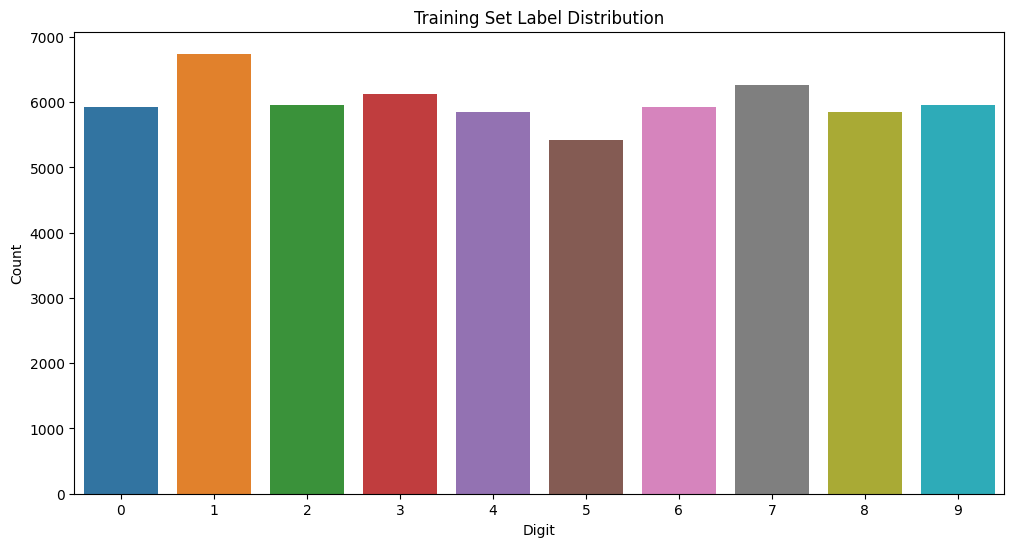

In [61]:
plt.figure(figsize=(12,6))
sns.barplot(x=list(num_train_labels.keys()), y=list(num_train_labels.values()))
plt.title("Training Set Label Distribution")
plt.xlabel("Digit")
plt.ylabel("Count")


Text(0, 0.5, 'Count')

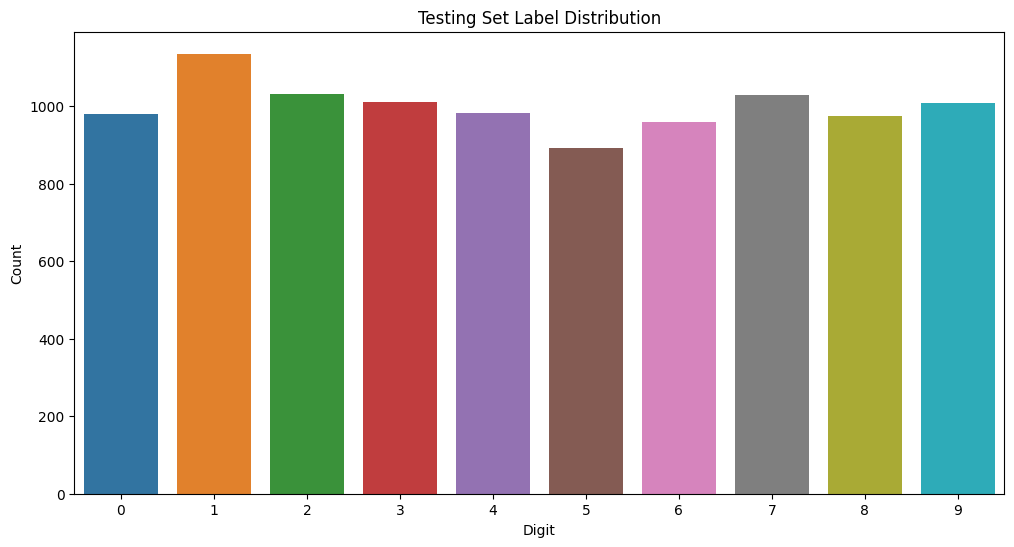

In [66]:
plt.figure(figsize=(12,6))
sns.barplot(x=list(num_test_labels.keys()), y=list(num_test_labels.values()))
plt.title("Testing Set Label Distribution")
plt.xlabel("Digit")
plt.ylabel("Count")

Both training and testing dataset seems to be balanced.

## Visualise samples from training data

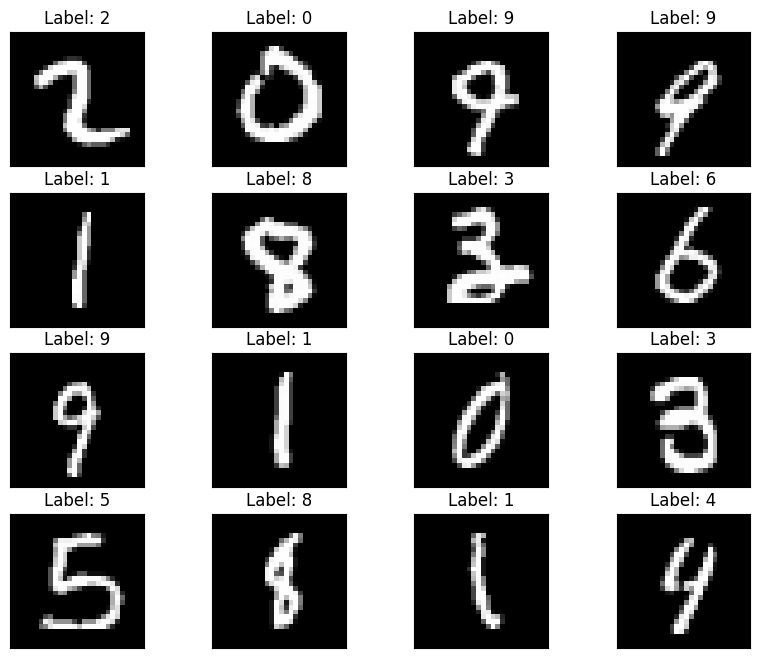

In [26]:
train_images, train_labels = next(iter(train_loader))
plt.figure(figsize=(10, 8))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].squeeze(0), cmap='gray')  # Use squeeze() to remove the channel dimension
    plt.title(f"Label: {train_labels[i]}")

## Visualise samples from the validation data

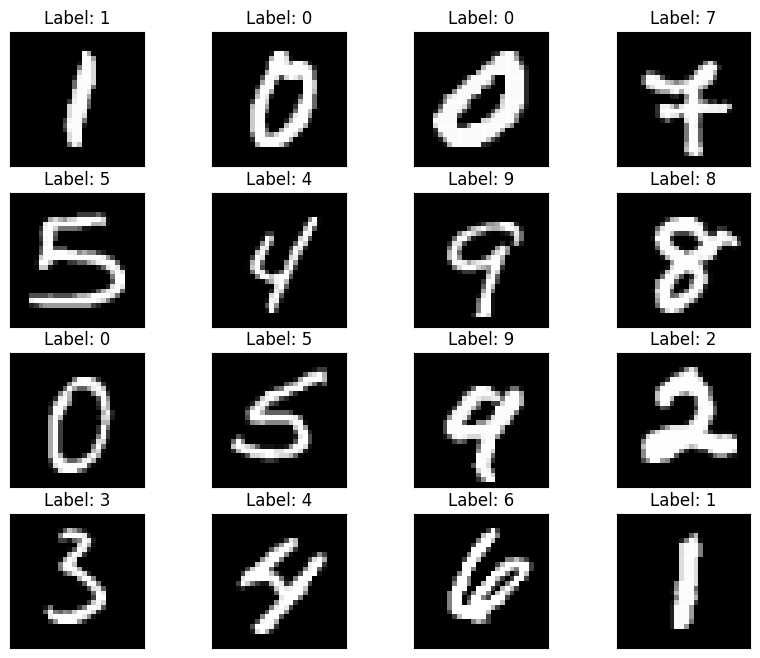

In [27]:
val_images, val_labels = next(iter(val_loader))
plt.figure(figsize=(10, 8))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(val_images[i].squeeze(0), cmap='gray')  # Use squeeze() to remove the channel dimension
    plt.title(f"Label: {val_labels[i]}")

## Visualise samples from test data

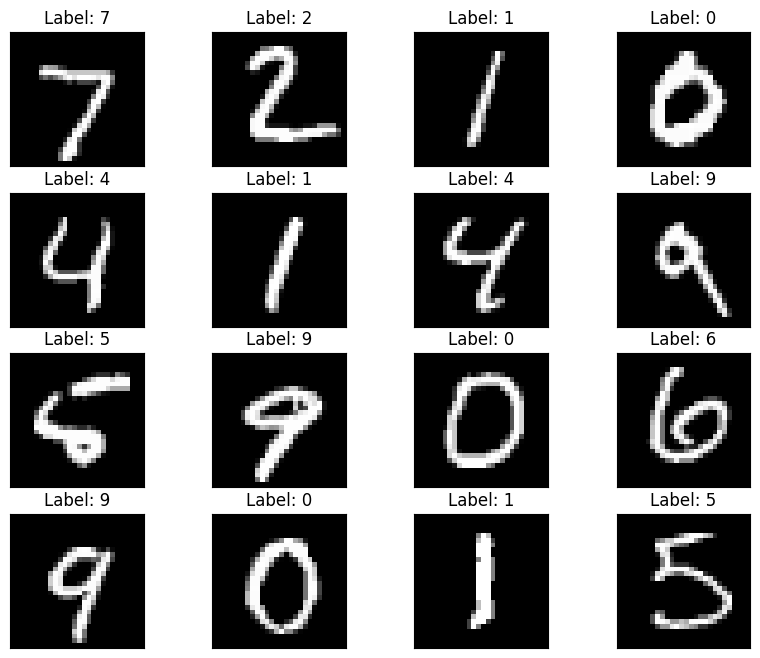

In [28]:
test_images, test_labels = next(iter(test_loader))
plt.figure(figsize=(10, 8))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i].squeeze(0), cmap='gray')  # Use squeeze() to remove the channel dimension
    plt.title(f"Label: {test_labels[i]}")

## Test the model on unseen data

In [9]:
img_names = os.listdir("unseen_data")
imgs = [np.array(Image.open(os.path.join("unseen_data", img_name))) for img_name in img_names]

Visualise the images in the unseen data folder

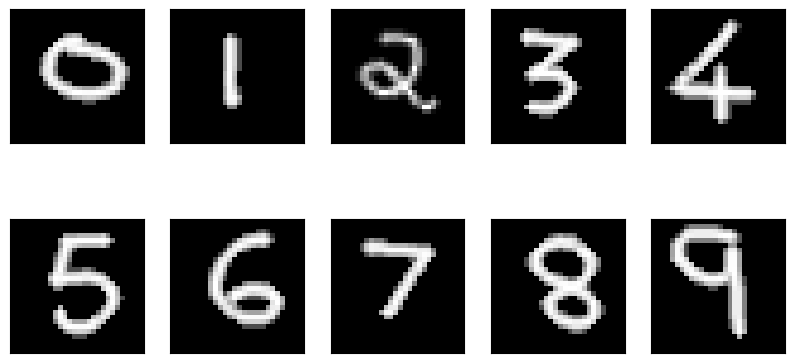

In [29]:
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imgs[i], aspect=1, cmap='gray')

use our trained model to try predict on these images

In [11]:
print(torch.from_numpy(imgs[0]))


tensor([[ 23,  23,  23,  23,  23,  23,  23,  23,  23,  23,  23,  23,  23,  23,
          23,  23,  23,  23,  23,  23,  23,  23,  23,  23,  23,  23,  23,  23],
        [ 23,  23,  23,  23,  23,  23,  23,  23,  23,  23,  23,  23,  23,  23,
          23,  23,  23,  23,  23,  23,  23,  23,  23,  23,  23,  23,  23,  23],
        [ 23,  23,  23,  23,  23,  23,  23,  23,  23,  23,  23,  23,  23,  23,
          23,  23,  23,  23,  23,  23,  23,  23,  23,  23,  23,  23,  23,  23],
        [ 23,  23,  23,  23,  23,  23,  23,  23,  23,  23,  23,  23,  23,  23,
          23,  23,  23,  23,  23,  23,  23,  23,  23,  23,  23,  23,  23,  23],
        [ 23,  23,  23,  23,  23,  23,  23,  23,  23,  23,  23,  23,  23,  23,
          23,  23,  23,  23,  23,  23,  23,  23,  23,  23,  23,  23,  23,  23],
        [ 23,  23,  23,  23,  23,  23,  23,  23,  23,  23,  23, 139, 171, 188,
         171,  23,  23,  23,  23,  23,  23,  23,  23,  23,  23,  23,  23,  23],
        [ 23,  23,  23,  23,  23,  23,  23,  2

In [12]:
imgs_tensor = torch.tensor(np.array(imgs), dtype=torch.float32)
imgs_tensor /= 255.0
imgs_tensor = imgs_tensor.unsqueeze(1)

check image tensor after preprocessing

In [13]:
imgs_tensor

tensor([[[[0.0902, 0.0902, 0.0902,  ..., 0.0902, 0.0902, 0.0902],
          [0.0902, 0.0902, 0.0902,  ..., 0.0902, 0.0902, 0.0902],
          [0.0902, 0.0902, 0.0902,  ..., 0.0902, 0.0902, 0.0902],
          ...,
          [0.0902, 0.0902, 0.0902,  ..., 0.0902, 0.0902, 0.0902],
          [0.0902, 0.0902, 0.0902,  ..., 0.0902, 0.0902, 0.0902],
          [0.0902, 0.0902, 0.0902,  ..., 0.0902, 0.0902, 0.0902]]],


        [[[0.0902, 0.0902, 0.0902,  ..., 0.0902, 0.0902, 0.0902],
          [0.0902, 0.0902, 0.0902,  ..., 0.0902, 0.0902, 0.0902],
          [0.0902, 0.0902, 0.0902,  ..., 0.0902, 0.0902, 0.0902],
          ...,
          [0.0902, 0.0902, 0.0902,  ..., 0.0902, 0.0902, 0.0902],
          [0.0902, 0.0902, 0.0902,  ..., 0.0902, 0.0902, 0.0902],
          [0.0902, 0.0902, 0.0902,  ..., 0.0902, 0.0902, 0.0902]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..

In [14]:
from helper_funcs import load_model, predict_digit

# test on CNN model
model = CNN(num_class = 10)
model = load_model(model, "model/cnn_model.pth")

In [15]:
imgs_tensor.shape

torch.Size([10, 1, 28, 28])

In [16]:
import torch.nn.functional as F


# create a function that predicts all the unseen image data
def predict(model, img_tensor):
    with torch.no_grad():
        logits = model(img_tensor)
        probabilities = F.softmax(logits, dim=1)
        _ , preds = torch.max(probabilities, 1)
        return preds.item()

In [17]:
predictions = []
for img in imgs_tensor:
    img = img.unsqueeze(0)
    prediction = predict(model, img)
    predictions.append(prediction)

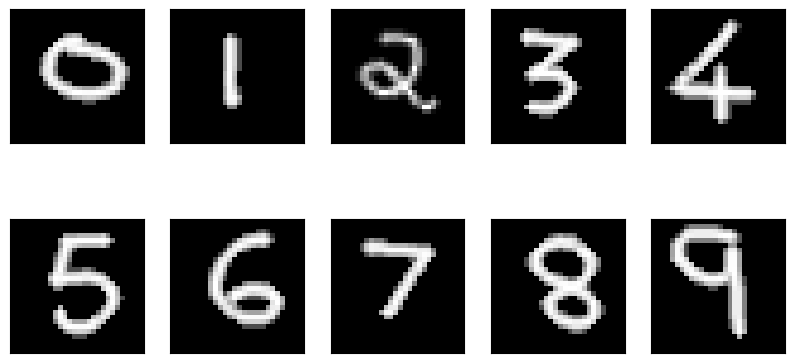

In [30]:
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imgs[i], aspect=1, cmap='gray')

In [19]:
predictions

[9, 1, 2, 3, 4, 5, 6, 7, 8, 4]

As we can see the model got 8 out of 10 digits correct

In [20]:
# test using ANN model
model2 = ANN(28*28, 10)
model2 = load_model(model2,"model/ann_model.pth")

In [21]:
predictions = []
for img in imgs_tensor:
    img = img.unsqueeze(0)
    prediction = predict(model2, img)
    predictions.append(prediction)

In [22]:
predictions

[9, 8, 2, 3, 6, 5, 6, 7, 8, 3]

We can see that the ANN model got 6 out of 10 digits correct, threrefore the CNN model outperformed the ANN model on unseen image data. This is expected as CNN is better suited for image classification task